# Import Libraries & Read Data

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('SampleSuperstore.csv')
df.head()

#df.loc[(df['Category'] == 'Furniture') & (df['Sub-Category'] == 'Bookcases'), ['Profit']]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [43]:
df.shape

(9994, 13)

In [54]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# **Check  Missing Values & Duplicated Values & Unique Values**

In [56]:
df.isnull().sum(axis=0)

,0
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


In [57]:
df.duplicated().sum()

17

In [58]:
df.drop_duplicates(inplace=True)

In [59]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols :
  print(col , '\n',df[col].unique())
  print('-'*80)

Ship Mode 
 ['Second Class' 'Standard Class' 'First Class' 'Same Day']
--------------------------------------------------------------------------------
Segment 
 ['Consumer' 'Corporate' 'Home Office']
--------------------------------------------------------------------------------
Country 
 ['United States']
--------------------------------------------------------------------------------
City 
 ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Ca

In [50]:
df.duplicated().sum()

0

# **Drop unimportent Cols**

In [60]:
df = df.drop(columns = 'Country' )
df = df.drop(columns='Postal Code')

# **Exploratory Data Analysis & Visualization**

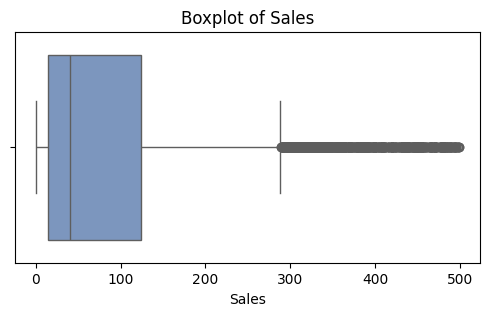

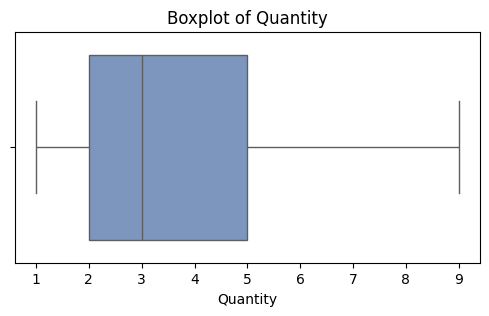

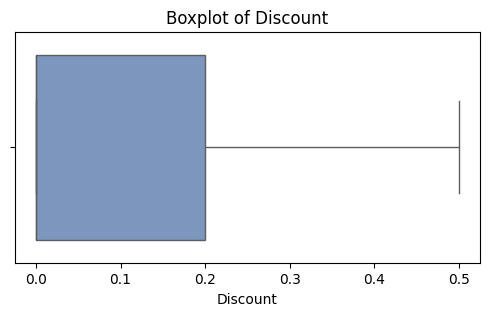

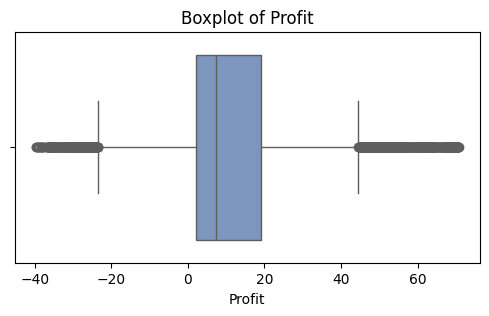

In [61]:
Numerical_Data = df.select_dtypes(include=['int64', 'float64'])
for col in Numerical_Data:
    Q1 = Numerical_Data[col].quantile(0.25)
    Q3 = Numerical_Data[col].quantile(0.75)
    IQR = Q3 - Q1
    filtered_data = Numerical_Data[(Numerical_Data[col] >= Q1 - 1.5 * IQR) & (Numerical_Data[col] <= Q3 + 1.5 * IQR)]
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=filtered_data, x=col, color='#7193C9')
    plt.title(f"Boxplot of {col}")
    plt.show()


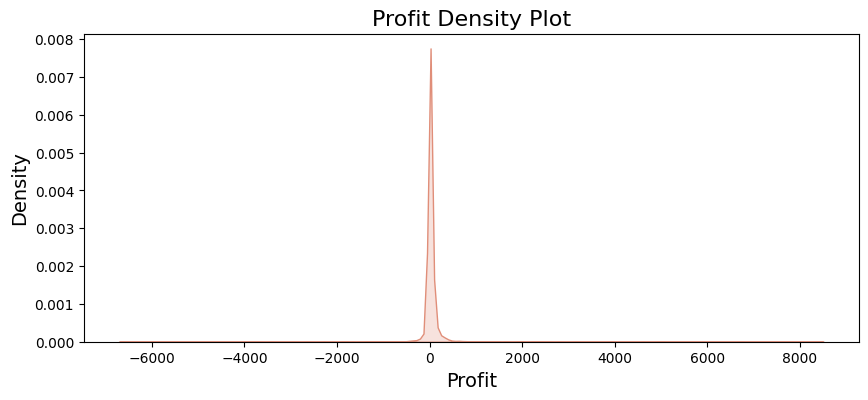

In [62]:
plt.figure(figsize=(10, 4))
sns.kdeplot(df['Profit'], fill=True, color='#E08E79')
plt.title("Profit Density Plot", fontsize=16)
plt.xlabel("Profit", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.show()

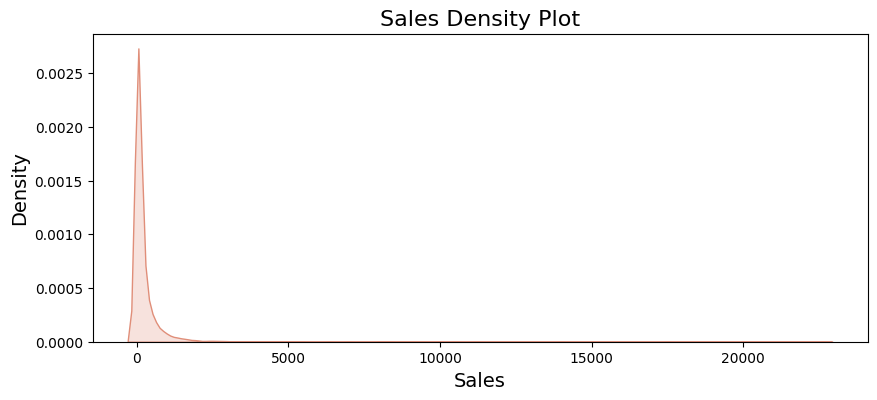

In [63]:
plt.figure(figsize=(10, 4))
sns.kdeplot(df['Sales'], fill=True, color='#E08E79')
plt.title("Sales Density Plot", fontsize=16)
plt.xlabel("Sales", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.show()

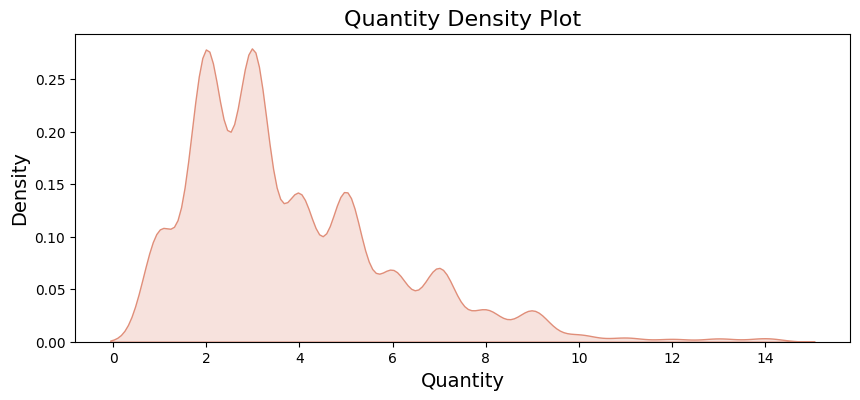

In [64]:
plt.figure(figsize=(10, 4))
sns.kdeplot(df['Quantity'], fill=True, color='#E08E79')
plt.title("Quantity Density Plot", fontsize=16)
plt.xlabel("Quantity", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.show()

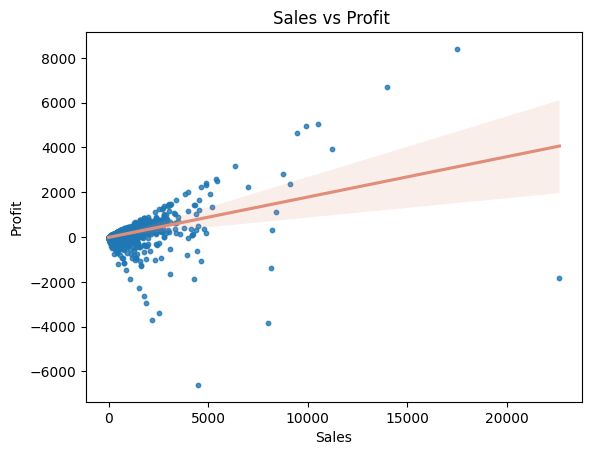

In [65]:
sns.regplot(x='Sales', y='Profit', data=df, scatter_kws={'s':10}, line_kws={'color': '#E08E79'})
plt.title("Sales vs Profit ")
plt.show()

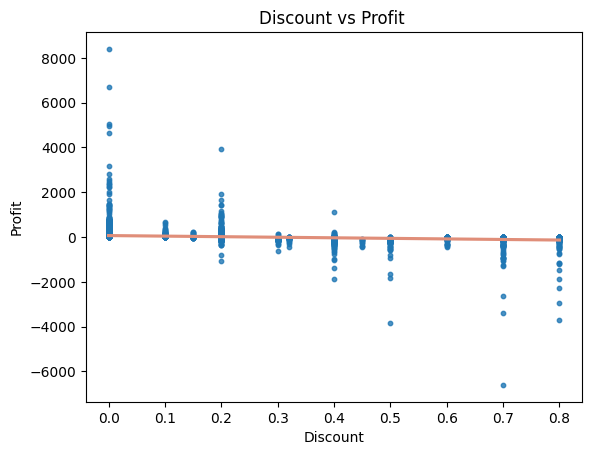

In [66]:
sns.regplot(x='Discount', y='Profit', data=df, scatter_kws={'s':10}, line_kws={'color': '#E08E79'})
plt.title("Discount vs Profit ")
plt.show()

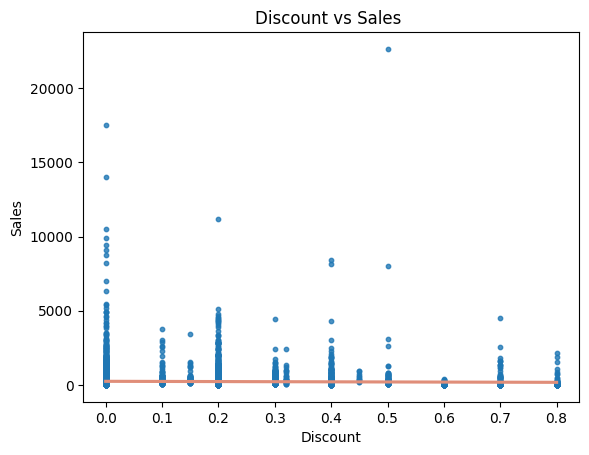

In [67]:
sns.regplot(x='Discount', y='Sales', data=df, scatter_kws={'s':10}, line_kws={'color': '#E08E79'})
plt.title("Discount vs Sales ")
plt.show()

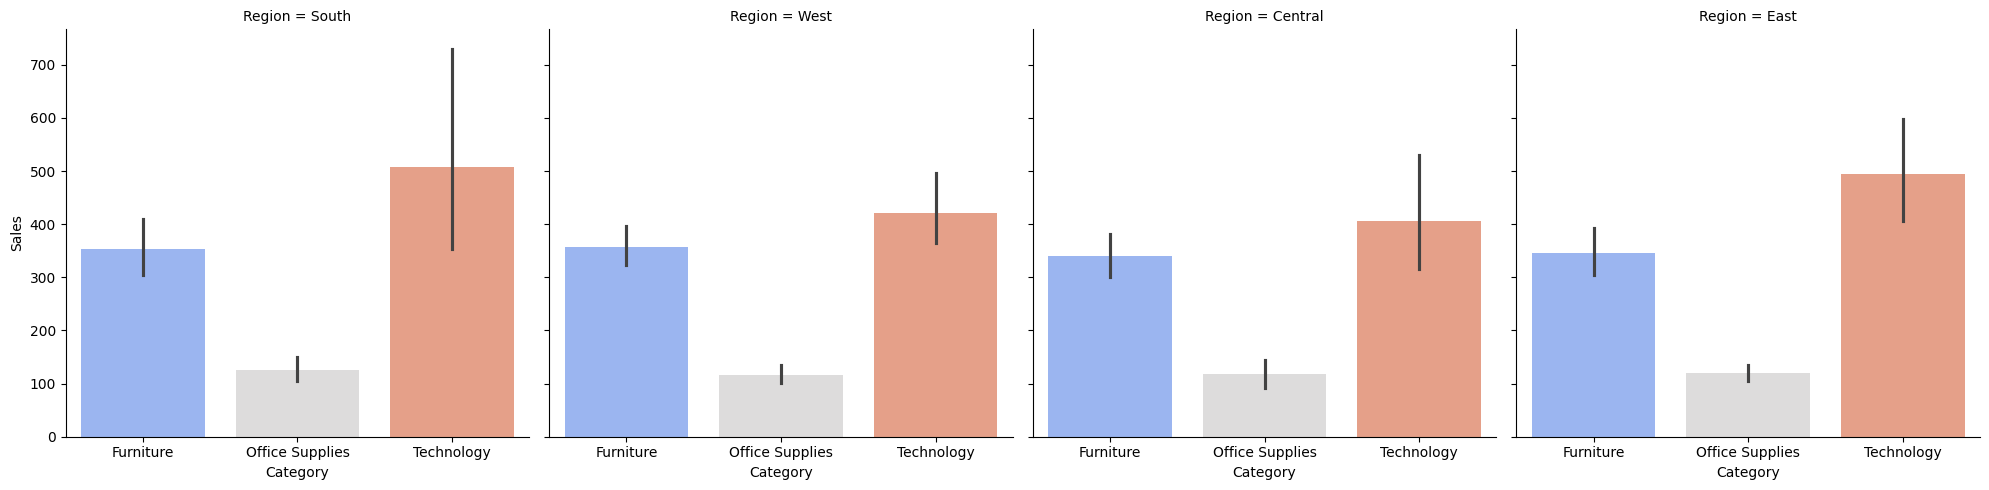

In [68]:
sns.catplot(data=df, kind="bar", x="Category", y="Sales",col="Region",hue='Category' , palette='coolwarm')

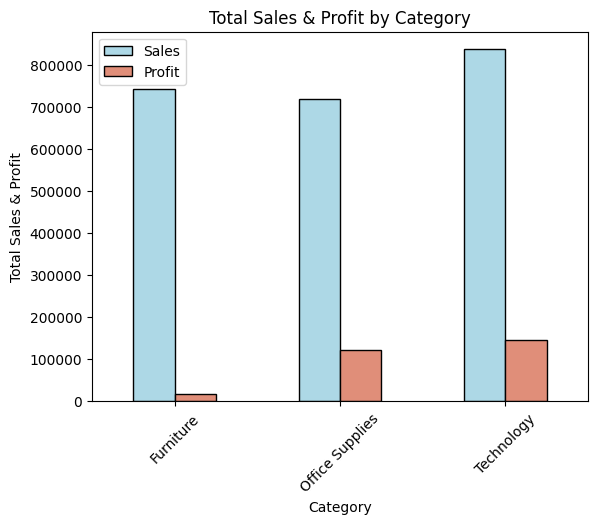

In [77]:
category_sales_profit = df.groupby('Category')[['Sales', 'Profit']].sum()
category_sales_profit.plot(kind='bar', color=['lightblue','#E08E79'], edgecolor='black')
plt.title('Total Sales & Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales & Profit')
plt.xticks(rotation=45)
plt.show()

Category
Office Supplies    22861
Furniture           8020
Technology          6939
Name: Quantity, dtype: int64


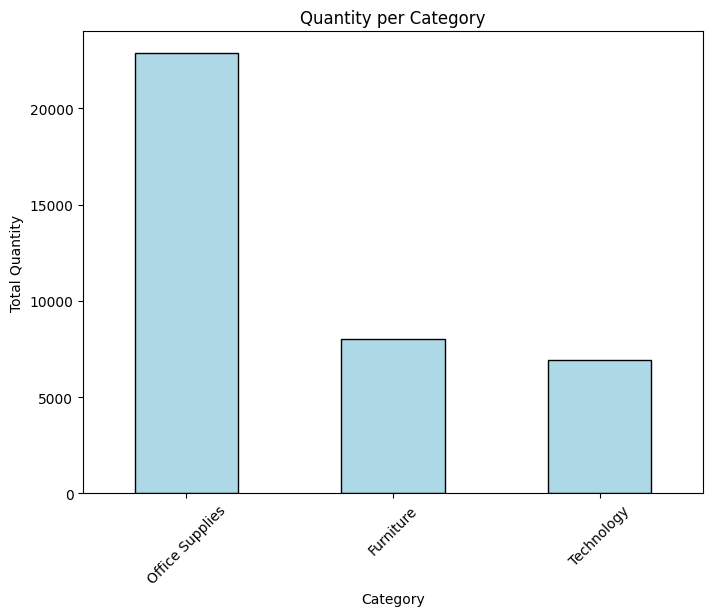

In [72]:
Quantity_per_Category=df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
print(Quantity_per_Category)
Quantity_per_Category.plot(kind='bar', color='lightblue', edgecolor='black', figsize=(8, 6))
plt.title('Quantity per Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.show()

In [73]:
pd.crosstab(df['Ship Mode'],df['Category'])

Category,Furniture,Office Supplies,Technology
Ship Mode,,,
First Class,327,909,301
Same Day,119,325,98
Second Class,427,1150,366
Standard Class,1245,3628,1082


In [74]:
pd.crosstab(df['Ship Mode'],df['Sub-Category'])

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Ship Mode,,,,,,,,,,,,,,,,,
First Class,128,76,112,239,49,85,12,32,30,146,60,23,216,138,119,25,47
Same Day,41,23,36,74,7,39,5,14,14,52,20,10,81,42,52,11,21
Second Class,162,79,155,262,48,134,15,53,37,184,62,14,288,175,171,43,61
Standard Class,444,288,492,947,124,357,36,155,136,574,221,68,774,534,504,111,190


In [75]:
df.groupby('Ship Mode').agg({'Profit':['sum','mean']})

Profit           
                        sum       mean
Ship Mode                             
First Class      48953.6561  31.850134
Same Day         15871.8869  29.283924
Second Class     57446.6516  29.565956
Standard Class  163969.2280  27.534715

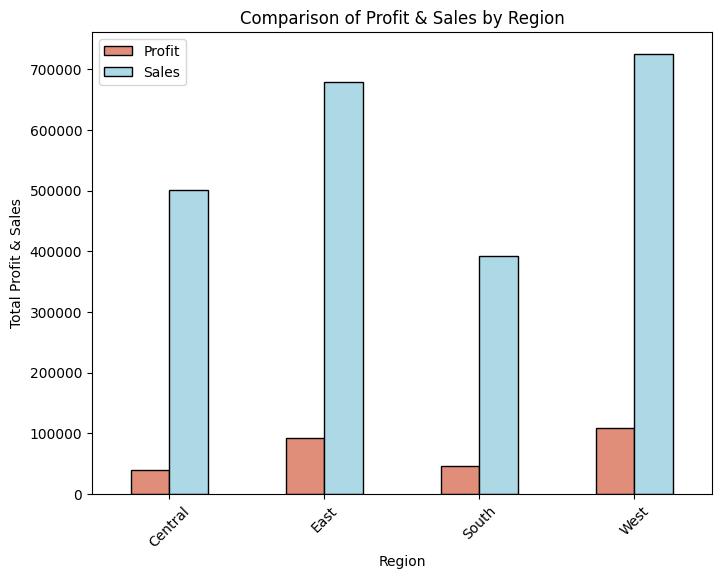

In [78]:
top_Region_Profit_Sales = df.groupby('Region')[['Profit','Sales']].sum()
top_Region_Profit_Sales.plot(kind='bar', color=['#E08E79','lightblue'], edgecolor='black', figsize=(8, 6))
plt.title('Comparison of Profit & Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit & Sales')
plt.xticks(rotation=45)
plt.show()

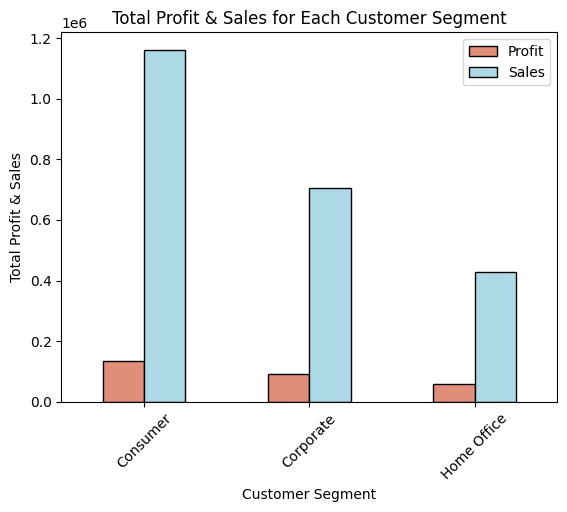

In [79]:
profit_Sales_by_segment = df.groupby('Segment')[['Profit','Sales']].sum()
profit_Sales_by_segment.plot(kind='bar', color=['#E08E79','lightblue'], edgecolor='black')
plt.title('Total Profit & Sales for Each Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Profit & Sales')
plt.xticks(rotation=45)
plt.show()

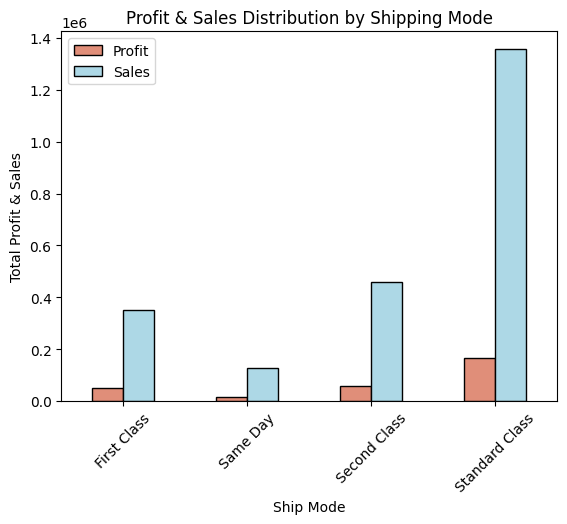

In [80]:
profit_Sales_by_Ship_Mode = df.groupby('Ship Mode')[['Profit','Sales']].sum()
profit_Sales_by_Ship_Mode.plot(kind='bar', color=['#E08E79','lightblue'], edgecolor='black')
plt.title('Profit & Sales Distribution by Shipping Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Profit & Sales')
plt.xticks(rotation=45)
plt.show()

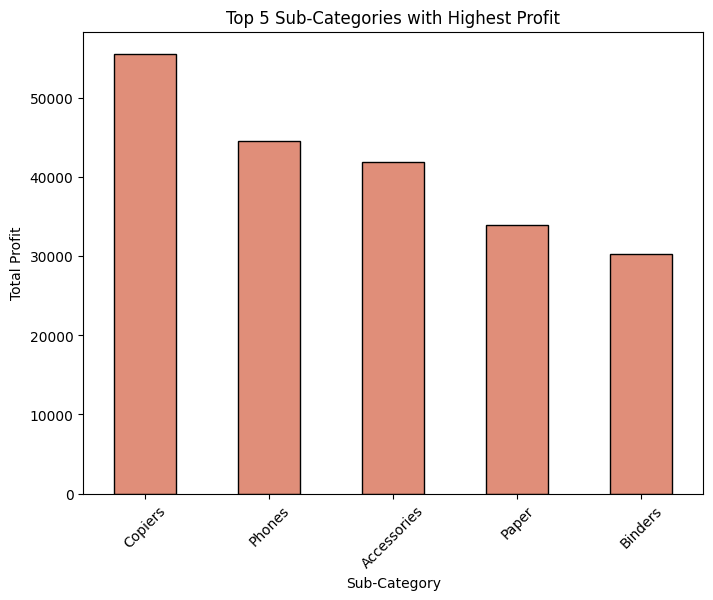

In [82]:
top_Sub_Category_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(5)
top_Sub_Category_profit.plot(kind='bar', color='#E08E79', edgecolor='black', figsize=(8, 6))
plt.title('Top 5 Sub-Categories with Highest Profit')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

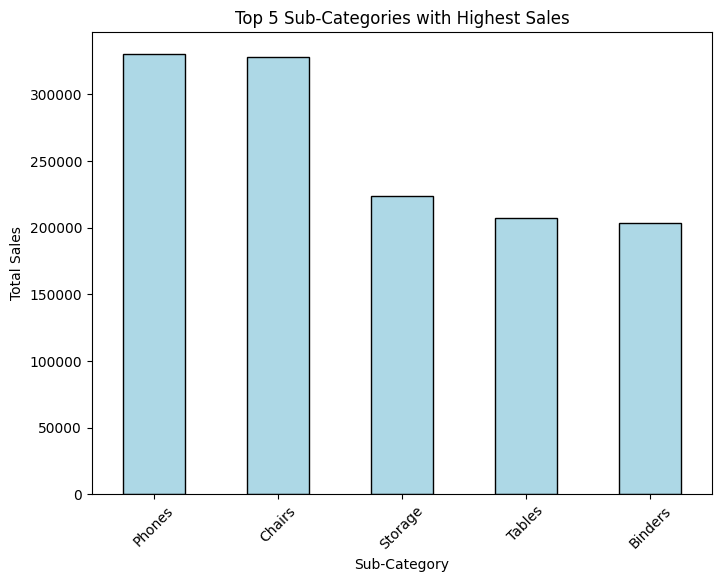

In [83]:
top_Sub_Category_Sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(5)
top_Sub_Category_Sales.plot(kind='bar', color='lightblue', edgecolor='black', figsize=(8, 6))
plt.title('Top 5 Sub-Categories with Highest Sales')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

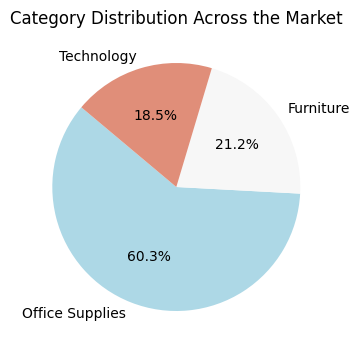

In [29]:
Category_counts = df['Category'].value_counts()
plt.figure(figsize=(4, 8))
plt.pie(Category_counts, labels=Category_counts.index, autopct='%1.1f%%',
        colors=["lightblue", "#F7F7F7", "#E08E79"], startangle=140)
plt.title("Category Distribution Across the Market", fontsize=12)
plt.show()


City
New York City    62013.8973
Los Angeles      30431.4267
Seattle          29121.6825
San Francisco    17466.1186
Detroit          13146.6935
Name: Profit, dtype: float64


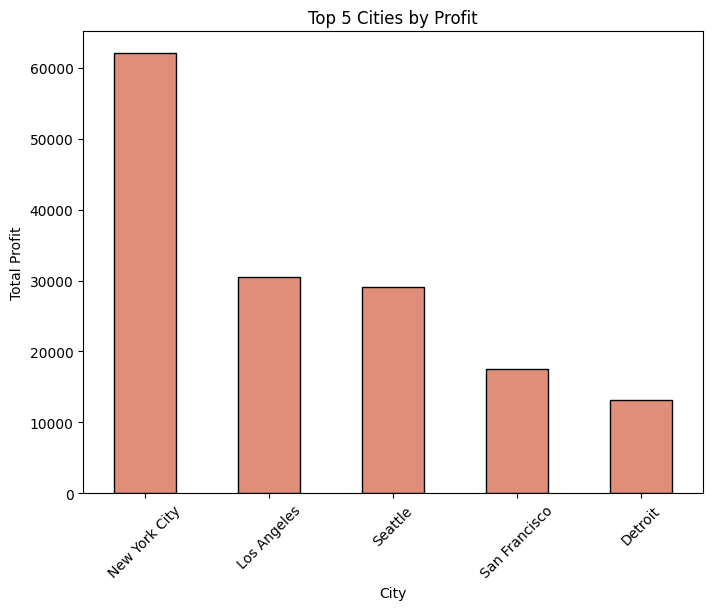

In [84]:
top_cities_profit = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(5)
print(top_cities_profit)
top_cities_profit.plot(kind='bar', color='#E08E79', edgecolor='black', figsize=(8, 6))
plt.title('Top 5 Cities by Profit')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()


City
New York City    256319.041
Los Angeles      175831.901
Seattle          119460.282
San Francisco    112577.172
Philadelphia     109061.461
Name: Sales, dtype: float64


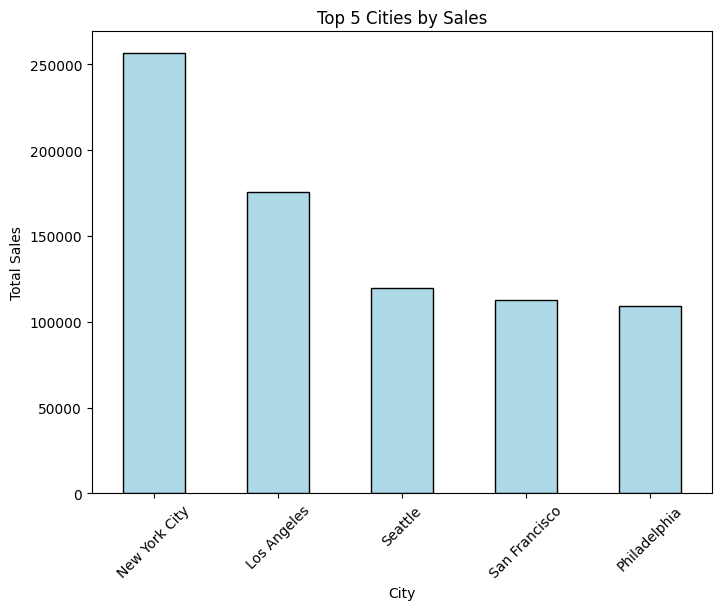

In [85]:
top_cities_Sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)
print(top_cities_Sales)
top_cities_Sales.plot(kind='bar', color='lightblue', edgecolor='black', figsize=(8, 6))
plt.title('Top 5 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


State
California    76330.7891
New York      74015.4622
Washington    33368.2375
Michigan      24428.0903
Virginia      18597.9504
Name: Profit, dtype: float64


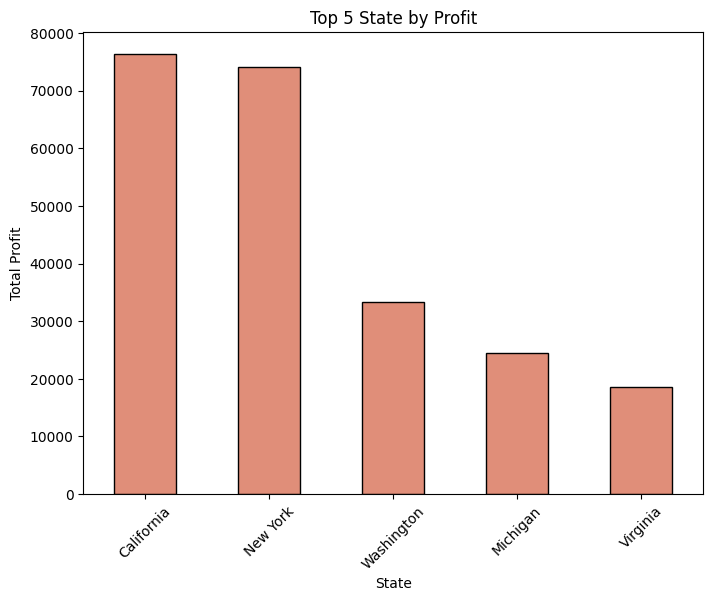

In [86]:
top_State_profit = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(5)
print(top_State_profit)
top_State_profit.plot(kind='bar', color='#E08E79', edgecolor='black', figsize=(8, 6))
plt.title('Top 5 State by Profit')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()


State
California      457576.2715
New York        310827.1510
Texas           170124.5418
Washington      138560.8100
Pennsylvania    116496.3620
Name: Sales, dtype: float64


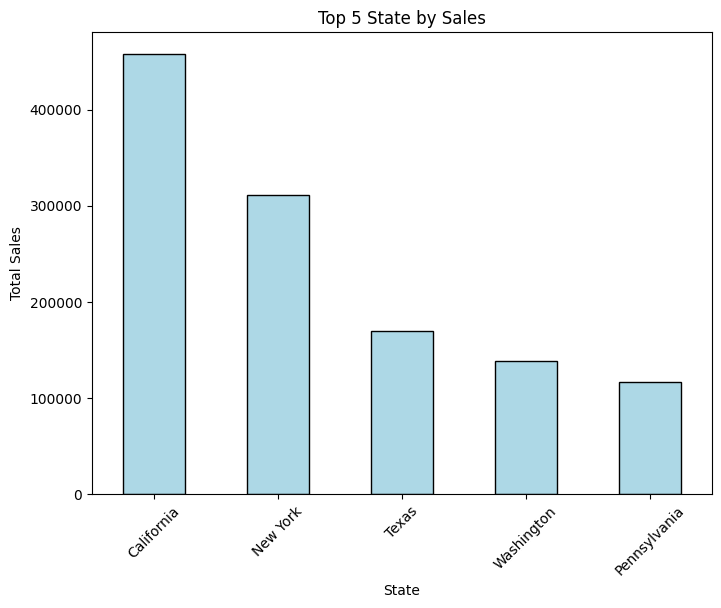

In [87]:
top_State_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(5)
print(top_State_sales)
top_State_sales.plot(kind='bar', color='lightblue', edgecolor='black', figsize=(8, 6))
plt.title('Top 5 State by Sales')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [88]:
df.groupby('Sub-Category', as_index = False)['Discount'].mean()

,Sub-Category,Discount
0,Accessories,0.078452
1,Appliances,0.166524
2,Art,0.074969
3,Binders,0.372011
4,Bookcases,0.211140
5,Chairs,0.170244
6,Copiers,0.161765
7,Envelopes,0.080315
8,Fasteners,0.082028
9,Furnishings,0.138494


In [89]:
df.groupby('Sub-Category', as_index = False)[['Profit','Sales']].mean()

,Sub-Category,Profit,Sales
0,Accessories,54.111788,215.974604
1,Appliances,38.922758,230.755710
2,Art,8.207059,34.096896
3,Binders,19.860710,133.645972
4,Bookcases,-15.230509,503.859633
5,Chairs,43.198582,532.971969
6,Copiers,817.909190,2198.941618
7,Envelopes,27.418019,64.867724
8,Fasteners,4.375660,13.936774
9,Furnishings,13.653476,95.902745


In [ ]:
# for (t,x) in df.groupby('Ship Mode') :
#   print(t,x)

First Class         Ship Mode      Segment        Country           City      State  \
35    First Class    Corporate  United States     Richardson      Texas   
36    First Class    Corporate  United States     Richardson      Texas   
44    First Class    Corporate  United States          Eagan  Minnesota   
45    First Class    Corporate  United States          Eagan  Minnesota   
55    First Class     Consumer  United States           Troy   New York   
...           ...          ...            ...            ...        ...   
9927  First Class    Corporate  United States  New York City   New York   
9933  First Class     Consumer  United States  Niagara Falls   New York   
9961  First Class  Home Office  United States        Houston      Texas   
9962  First Class  Home Office  United States        Houston      Texas   
9981  First Class     Consumer  United States      Fairfield       Ohio   

      Postal Code   Region         Category Sub-Category      Sales  Quantity  \
35    

In [90]:
df.groupby('Ship Mode').aggregate({'Profit': 'max', 'Sales': 'max'})

,Profit,Sales
Ship Mode,,
First Class,6719.9808,13999.96
Same Day,2229.0240,7999.98
Second Class,2799.9840,8749.95
Standard Class,8399.9760,22638.48
